# Tercer parcial

Sofia Macarena Castillo Badilla

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\marub\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
ensayo3_excel = r"C:\Users\marub\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\marub\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\marub\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col = 0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col = 0)

In [4]:
# como se las llaves 
ensayo3_dict.keys()


ensayos_dfs = []
for sujeto in ensayo3_dict.keys():
    ensayos_dfs.append(ensayo3_dict[sujeto])

## filtrado de matrices

- para juntar las matrices (todos los sujetos) en 1
- porque un promedio sería muy restringido

In [5]:
# filtrado de matrices
threshold = 0.5
porcentaje = 0.6

# conjuntamos las matrices
stack = np.stack([df.values for df in ensayos_dfs])

# aplicamos el filtro a cada matriz
above = stack > threshold

N = len(ensayos_dfs)
count_above = above.sum(axis = 0)  # contar cuántos valores superan el umbral en celda

min_requerido = int(np.ceil(porcentaje*N)) # np.ceil redondea para arriba
# con esto bastará con quedarnos con las celdas de "above" que cumplan con min_requerido, para así tener el número de sujetos que superan el umbral

# Vamos a obtener a la matriz binarizada de todos
result_bool = count_above >= min_requerido

result_df = pd.DataFrame(result_bool, index=ensayos_dfs[0].index, columns=ensayos_dfs[0].columns)

<Axes: >

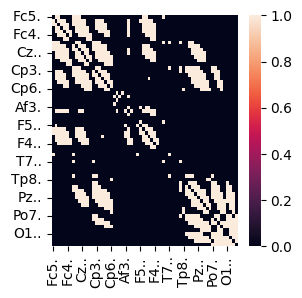

In [6]:
# Matriz binarizada --> data frame comprimido, con la info. de los 109 sujetos
plt.figure(figsize=(3,3))
sns.heatmap(result_df)

## Generar estadísticos para decidir los umbrales

In [7]:
ensayos_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []

fig, axes = plt.subplots(2,2, figsize=(12,7))


for sujeto in ensayos_dfs:
    # cálculo estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))

    # plots
    sns.histplot(sujeto.stack().values, ax=axes[0],[0], kde=True)  # kde=True --> para mostrar la distribución suavizada
    sns.ecdfplot(sujeto.stack().values, ax=axes[0],[1])
axes[1][0].plot(th25, label="Percentil al 25%")
axes[1][0].plot(th50, label="Percentil al 50%")
axes[1][0].plot(th75, label="Percentil al 75%")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].legend()


SyntaxError: positional argument follows keyword argument (892500494.py, line 18)